<a href="https://colab.research.google.com/github/RegaipKURT/Advanced_AI_with_PYTHON/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications import ResNet50V2
from keras.models import load_model

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
model = VGG19(weights='imagenet', 
                      include_top=False, 
                      input_shape=(32, 32, 3))

In [0]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model
import tensorflow as tf

for layer in model.layers[:-1]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x) 
predictions = Dense(10, activation='softmax')(x) 
model = Model(inputs=model.input, outputs=predictions)

In [20]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [21]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train[10])
train_y = np.zeros((50000,10), dtype="uint8")
print(train_y[2])
for sira, deger in enumerate(y_train):
    train_y[sira, deger] = 1

[4]
[0 0 0 0 0 0 0 0 0 0]


In [22]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["mse"])
history = model.fit(x_train, train_y, epochs=20, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 929us/step - loss: 10.9331 - mean_squared_error: 0.1369 - val_loss: 10.5125 - val_mean_squared_error: 0.1312
Epoch 2/20
40000/40000 [==============================] - 37s 916us/step - loss: 10.6367 - mean_squared_error: 0.1327 - val_loss: 10.4749 - val_mean_squared_error: 0.1306
Epoch 3/20
40000/40000 [==============================] - 36s 912us/step - loss: 10.6566 - mean_squared_error: 0.1327 - val_loss: 10.4797 - val_mean_squared_error: 0.1306
Epoch 4/20
40000/40000 [==============================] - 36s 912us/step - loss: 10.4873 - mean_squared_error: 0.1304 - val_loss: 10.5214 - val_mean_squared_error: 0.1309
Epoch 5/20
40000/40000 [==============================] - 37s 918us/step - loss: 10.5279 - mean_squared_error: 0.1309 - val_loss: 10.5038 - val_mean_squared_error: 0.1305
Epoch 6/20
40000/40000 [==============================] - 36s 911us/step - loss: 10.4655 - mean

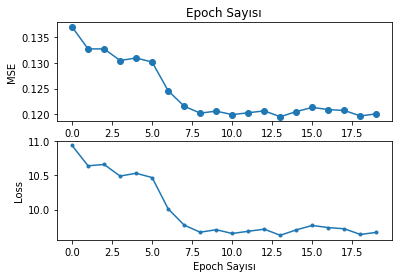

In [23]:
plt.subplot(2, 1, 1)
plt.plot(history.history["mean_squared_error"], 'o-')
plt.title('Epoch Sayısı')
plt.ylabel('MSE')

plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], '.-')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Loss')

plt.show()